Задание №9.1
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

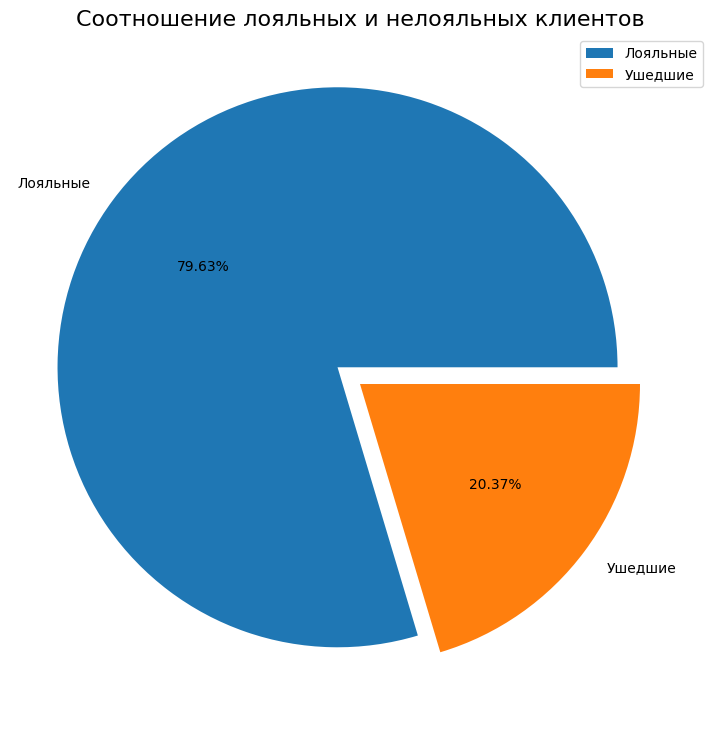

In [ ]:
# Задание №9.1
#Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.


import pandas as pd

churn_data = pd.read_csv('data_2/churn.csv', sep=',')
#display(churn_data.head())

churn_data.drop('RowNumber', axis=1, inplace=True)
#display(churn_data.head())

#import plotly
#import plotly.express as px
#print(plotly.__version__)

import matplotlib.pyplot as plt
%matplotlib inline


#Сначала замененим показатели лояльности 1 и 0 на "Нелояльные клиенты" и "Лояльные клиенты" соотвественно. Данная замена позволит отнести клиентов по категориям и в последствии сделает график нагляднее.
churn_data['Exited_Label'] = churn_data['Exited'].replace({1: 'Ушедшие', 0: 'Лояльные'})
#display(churn_data_loyal);

#посчитаем количественные значения показателей лояльности
churn_data_exited = churn_data['Exited_Label'].value_counts()


#Стром круговую диаграамму для отображения пропорции соотношения лояльных и нелояльных клиентов
fig = plt.figure(figsize=(7, 7))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data_exited,
    labels=churn_data_exited.index,
    autopct='%.2f%%',
    explode = [0.1, 0]
);
axes.set_title('Соотношение лояльных и нелояльных клиентов', fontsize=16)
axes.legend();


#Ответ на задание №9.1
#Количетво лояльных клиентов составляет 79,63% от общего числа клиентов.
#Количетво нелояльных клиентов составляет 20,37% от общего числа клиентов.


#Ответ на задание №9.1
#Количетво лояльных клиентов составляет 79,63% от общего числа клиентов.
#Количетво нелояльных клиентов составляет 20,37% от общего числа клиентов.

Задание №9.2
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [20]:
# Задание №9.2
#Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

import pandas as pd

churn_data = pd.read_csv('data_2/churn.csv', sep=',')
#display(churn_data.head())

churn_data.drop('RowNumber', axis=1, inplace=True)
#display(churn_data.head())

import plotly
import plotly.express as px
#print(plotly.__version__)

#import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns


#Задаем условие
churn_data_balance = churn_data[churn_data['Balance'] >= 2500]

#Строим график распределения баланса
fig = px.histogram(
    churn_data_balance,
    x='Balance',
    labels={'Balance':'Баланс на счету клиентов, $', 'y':'Количество клиентов, чел.'},
    title = "Распределение денежных средств пользователей на счетах",
    marginal='box',
    nbins=30,
)
fig.show()


#Ответ на задание 9.2. 
# По результатам полученного распределения установлено, что большинство клиентов имеют баланс на счету от 100 до 140 тыс. долларов.
# Медианное значение при этом находится в районе 120 тыс. долларов


#Ответ на задание 9.2. 
По результатам полученного распределения установлено, что большинство клиентов имеют баланс на счету от 100 до 140 тыс. долларов.
Медианное значение при этом находится в районе 120 тыс. долларов

Задание №9.3
Посмотрите на распределение баланса клиента в разрезе признака оттока.
Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [21]:
# Задание №9.3
#Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

import pandas as pd

churn_data = pd.read_csv('data_2/churn.csv', sep=',')
#display(churn_data.head())

churn_data.drop('RowNumber', axis=1, inplace=True)
#display(churn_data.head())

import plotly
import plotly.express as px
#print(plotly.__version__)

#import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns


#Задаем условие выборки баланса более 2500 долларов и для удобства отбражения проводим заему признаков 1 и 0 на "Лояльные" и "Нелояльные"
churn_data['Exited_Label'] = churn_data['Exited'].replace({1: 'Ушедшие', 0: 'Лояльные'})
churn_data_balance = churn_data[churn_data['Balance'] >= 2500]


#Строим график распределения баланса в зависимости от лояльности
fig = px.box(
    churn_data_balance,
    x='Balance',
    y='Exited_Label',
    color='Exited_Label',
    orientation = 'h',
    labels={'Balance':'Баланс на счету клиентов, $', 'y':'Лояльные клиенты - 0; Нелояльные клиенты - 1'},
    title = "Распределение денежных средств пользователей в зависимости от их лояльности",
)
fig.show()




#
#Ответ 9.3. Несмотря на то, что у лояльных клиентов медианное зачение баланса находится немного ниже, чем у нелояльных, распределение деженых средств в сторону макисмальных значений у лояльных клиентов больше. 
#Таким образом можно сделать вывод, что нелояльных клиентов не устраивали условия обслуживания, предлагаемые в зависимости от уровня их депозита.

Ответ 9.3. Несмотря на то, что у лояльных клиентов медианное зачение баланса находится немного ниже, чем у нелояльных, распределение деженых вредст в сторону макисмальных значений у лояльных клиентов больше. Таким обрзом боразом можно сделать вывод, что нелояльных клиентов не устраивали условия обслуживания, предлагаемые в зависимости от уровня их дипозита.

Задание №9.4
Посмотрите на распределение возраста в разрезе признака оттока. 
В какой группе больше потенциальных выбросов? 
На какую возрастную категорию клиентов стоит обратить внимание банку?

In [ ]:
# Задание №9.4


import pandas as pd

churn_data = pd.read_csv('data_2/churn.csv', sep=',')
#display(churn_data.head())

churn_data.drop('RowNumber', axis=1, inplace=True)
#display(churn_data.head())

import plotly
import plotly.express as px
#print(plotly.__version__)

#import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns


#Задаем условие выборки баланса более 2500 долларов и для удобства отбражения проводим заему признаков 1 и 0 на "Лояльные" и "Нелояльные"
churn_data['Exited_Label'] = churn_data['Exited'].replace({1: 'Ушедшие', 0: 'Лояльные'})
churn_data_balance = churn_data[churn_data['Balance'] >= 2500]


#Строим график распределения возраста в зависимости от лояльности
fig = px.box(
    churn_data_balance,
    x='Age',
    y='Exited_Label',
    color='Exited_Label',
    orientation = 'h',
    labels={'Age':'Возраст клиентов', 'y':'Лояльные клиенты - 0; Нелояльные клиенты - 1'},
    height = 800, 
    width=1200,
    title = "Распределение возраста клиентов по признаку лояльности",
)
fig.show()




# Ответ 9.4. Для категории лояльные клиенты наблюдается большее количтво выбросов данных. 
# По результатам анализа распределения может быть выдана рекомендация обратить на возврастную категорию от 40 до 60 (и старше). 
# Именно эта возростная группа кличентов является является ушедшими.


Ответ 9.4. Для категории лояльные клиенты наблюдается большее количтво выбросов данных. 
По результатам анализа распределения может быть выдана рекомендация обратить на возврастную категорию от 40 до 60 (и старше). 
Именно эта возростная группа кличентов является является ушедшими.

Задание 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.
Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [35]:
# Задание №9.5

import pandas as pd

churn_data = pd.read_csv('data_2/churn.csv', sep=',')
#display(churn_data.head())

churn_data.drop('RowNumber', axis=1, inplace=True)
#display(churn_data.head())

import plotly
import plotly.express as px
#print(plotly.__version__)

#Строим график взаимосвязи кредитного рейтинга клиента и его предполагаемой зарплаты (Поле рассеяния)
fig = px.scatter(
    churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    labels={'EstimatedSalary':'Ожидаемая зарплата, тыс.$', 'CreditScore':'Кредитный рейтинг, ед.'},
    height = 800, 
    width=1200,
    title = "График взаимосвязи кредитного рейтинга клиента и его предполагаемой зарплаты (Поле рассеяния)",
)
fig.show()

# Ответ 9.5.  По результам анализа поле рассеяния определено, что отсутствует зависимости между кредитным рейтингом и предполагаемой заработной платой. 
# При этом можно сделать дополнительные выводы, что плотносться рассеяние показывает, что больинство клиентов имеют рейтинг от 600 до 700 ед., а клиентов с рейтингом менее 400 всего 14 человек.

Ответ 9.5.  По результам анализа поле рассеяния определено, что отсутствует зависимости между кредитным рейтингом и предполагаемой заработной платой. 
При этом можно сделать дополнительные выводы, что плотносться рассеяние показывает, что больинство клиентов имеют рейтинг от 600 до 700 ед., а клиентов с рейтингом менее 400 всего 14 человек.

Задание 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [57]:
# Задание №9.6

import pandas as pd

churn_data = pd.read_csv('data_2/churn.csv', sep=',')
#display(churn_data.head())

churn_data.drop('RowNumber', axis=1, inplace=True)
#display(churn_data.head())

import plotly
import plotly.express as px
#print(plotly.__version__)



#Считаем процент ушедших клиентов в каждой группе как среднее по столбцу Exited 
# (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

bar_data = churn_data.groupby(
    by='Gender',
    as_index=False
)[['Exited']].mean()


#Строим распределение ушедших пользователей по половому признаку
fig = px.bar(
    data_frame=bar_data,
    x='Gender',
    y='Exited',
    color='Gender',  # Разделяем по цветам на основе столбца "Gender"
    labels={'Gender':'Половой признак клиентов', 'Exited':'Процент нелояльности'},
    title='Распределение ушедших пользователей по половому признаку',
    width=800,
    height=500
)

fig.show()


# Ответ 9.5. Женщины уходят чаще, чем мужчины (в 1.56 раза чаще).

Ответ 9.5. Женщины уходят чаще, чем мужчины (в 1.56 раза чаще).